In [2]:
#Importar librerias
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Abrir los json origen
df1 = pd.read_json('http://s3.amazonaws.com/logtrust-static/test/test/data1.json')
df2 = pd.read_json('http://s3.amazonaws.com/logtrust-static/test/test/data2.json')
df3 = pd.read_json('http://s3.amazonaws.com/logtrust-static/test/test/data3.json')

#Cambios en el primer dataframe
#Los milisegundos pasan a ser tratados como fecha
df1['d'] = pd.to_datetime(df1['d'], unit='ms')
#Los componentes en Categoría son convertidos a mayúsculas
df1['cat'] = df1['cat'].str.upper()
#Se renombra la columna d
df1 = df1.rename(columns={'d':'date'})

#Cambios en el segundo dataframe
#Se renombran las columnas sin necesitar más transformaciones
df2 = df2.rename(columns={'myDate':'date', 'categ':'cat', 'val':'value'})

#Cambios en el tercer dataframe
#Se establece un patrón que recogerá lo que esté dentro de los símbolos #
cat_pattern = r'#(.*)#'
df3['cat'] = df3['raw'].str.extract(cat_pattern)

#Se establece el patrón para las fechas: en este caso se repite dos veces ya que en la primera se crea un match
date_pattern = r'([0-9]{4}/0?[1-9]|1[0-2]/0?[1-9]|[12]\d|30|31)'
df3['date'] = df3['raw'].str.extract(pat=date_pattern)
#Y en esta parte ya se pueden adjuntar los grupos encontrados
date_pattern = r'([0-9]{4}-((0[1-9])|(1[0-2]))-(0[1-9]|[1-2][0-9]|3[0-1]))'
df3['date'] = df3['raw'].str.extract(pat=date_pattern)
#Se elimina la variable raw y se cambia de nombre a 'val'
df3.drop('raw', axis=1, inplace=True)
df3 = df3.rename(columns={'val':'value'})

#Se concatenan los 3 dataframes obteniendo una tabla ordenada
df=pd.concat([df1, df2, df3])
#La columna fecha se pasa a formato fecha
df['date'] = pd.to_datetime(df['date'])
#Se agrupan por fecha y categoría, teniendo de valor agregado la suma de estos.
df = df.groupby(['date', 'cat']).sum()
#Se resetea el index para evitar problemas a la hora de hacer los plots
df = df.reset_index()



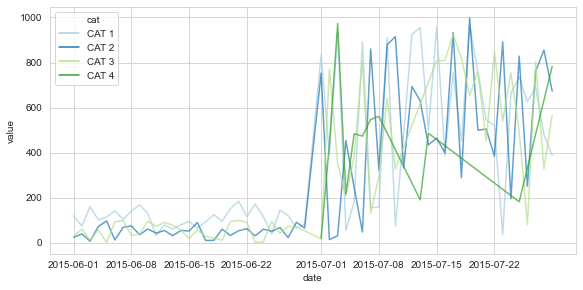

In [11]:
# Se crea una figura y axes vacios.
fig, ax = plt.subplots(figsize=[8,4])  
# Para evitar que los tickers se solapen
plt.tight_layout()
#Estilo de fondo blanco
sns.set_style('whitegrid')
#Mediante seaborn se crea el plot
sns.lineplot(x='date', y='value', hue='cat', data=df, hue_order=['CAT 1', 'CAT 2', 'CAT 3', 'CAT 4'], legend='brief', alpha=0.7, palette = "Paired", markers='O', ax = ax)
plt.show()

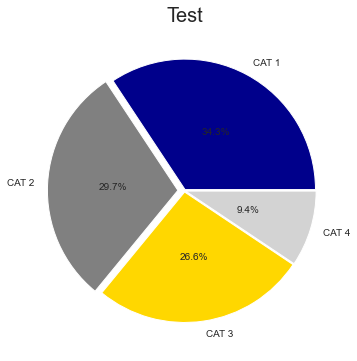

In [12]:
# Se agrupan la suma de datos por categoría
dfp = df.groupby('cat').sum().reset_index()
# Definición de colores
colors = ['DarkBlue', 'Gray', 'Gold', 'lightgray']
# Creación de una figura y axes vacíos
pie, ax = plt.subplots(figsize=[10,6])
# Se crea el plot con los distintos parámetros
plt.pie(x=dfp.value, autopct="%.1f%%", explode=[0.01, 0.05, 0.01, 0.01], pctdistance=0.5, labels=df.cat.unique(), colors=colors)
#Se incluye un título
plt.title("Test", fontsize=20);
plt.show()